<a href="https://colab.research.google.com/github/Brackly/Exploratory-Data-Analysis/blob/main/RetailSalesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS OF RETAIL DATA (SALES OF ITEMS)

#Loading data and libraries

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
import wquantiles

In [ ]:
urls= {
    "products":"https://raw.githubusercontent.com/Brackly/Retail_sales-data-exploration-using-sql/master/SalesLT.Product.csv",
    "sales_orders":"https://raw.githubusercontent.com/Brackly/Retail_sales-data-exploration-using-sql/master/SalesLT.SalesOrderDetail.csv",
    "customer_orders":"https://raw.githubusercontent.com/Brackly/Retail_sales-data-exploration-using-sql/master/SalesLT.SalesOrderHeader.csv"
}

In [52]:
path=urls["sales_orders"]
df = pd.read_csv(path,index_col="SalesOrderID")
df.head()

,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
SalesOrderID,,,,,,,,
71774,110562,1,836,356.898,0.0,356.898,e3a1994c-7a68-4ce8-96a3-77fdd3bbd730,2008-06-01 00:00:00.000
71774,110563,1,822,356.898,0.0,356.898,5c77f557-fdb6-43ba-90b9-9a7aec55ca32,2008-06-01 00:00:00.000
71776,110567,1,907,63.900,0.0,63.900,6dbfe398-d15d-425e-aa58-88178fe360e5,2008-06-01 00:00:00.000
71780,110616,4,905,218.454,0.0,873.816,377246c9-4483-48ed-a5b9-e56f005364e0,2008-06-01 00:00:00.000
71780,110617,2,983,461.694,0.0,923.388,43a54bcd-536d-4a1b-8e69-24d083507a14,2008-06-01 00:00:00.000


In [53]:
prod_path=urls["products"]
prods=pd.read_csv(prod_path,index_col="ProductID")
prods.head()

,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ThumbNailPhoto,ThumbnailPhotoFileName,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,2002-06-01 00:00:00.000,NaN,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,43dd68d6-14a4-461f-9069-55309d90ea7e,2008-03-11 10:01:36.827
706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,2002-06-01 00:00:00.000,NaN,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,9540ff17-2712-4c90-a3d1-8ce5568b2462,2008-03-11 10:01:36.827
707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,NaN,NaN,35,33,2005-07-01 00:00:00.000,NaN,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,2e1ef41a-c08a-4ff6-8ada-bde58b64a712,2008-03-11 10:01:36.827
708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,NaN,NaN,35,33,2005-07-01 00:00:00.000,NaN,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,a25a44fb-c2de-4268-958f-110b8d7621e2,2008-03-11 10:01:36.827
709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,2005-07-01 00:00:00.000,2006-06-30 00:00:00.000,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,18f95f47-1540-4e02-8f1f-cc1bcb6828d0,2008-03-11 10:01:36.827


In [64]:
prods2=pd.DataFrame(data=prods,columns={"ProductCategoryID":"ProductCategoryID"})
prods2.head()

,ProductCategoryID
ProductID,
680,18
706,18
707,35
708,35
709,27


In [65]:
df=df.merge(prods2,on="ProductID",how="inner")

In [66]:
df.head()

,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate,ProductCategoryID
0,110562,1,836,356.898,0.0,356.898,e3a1994c-7a68-4ce8-96a3-77fdd3bbd730,2008-06-01 00:00:00.000,18
1,110741,4,836,356.898,0.0,1427.592,0a9a4bef-bb06-49b2-942d-c8a2cd010a84,2008-06-01 00:00:00.000,18
2,111081,4,836,356.898,0.0,1427.592,2cb6ffb5-8f2c-46e2-a363-d108facaa14d,2008-06-01 00:00:00.000,18
3,113089,3,836,356.898,0.0,1070.694,aa3c697d-653d-4d79-b824-b92672fe8b9e,2008-06-01 00:00:00.000,18
4,110563,1,822,356.898,0.0,356.898,5c77f557-fdb6-43ba-90b9-9a7aec55ca32,2008-06-01 00:00:00.000,18


# Moments of Distribution


## Location (Mean & Median) & Variability (Deviation and Variance)

In [ ]:
df["OrderQty"].describe()

count    542.000000
mean       3.850554
std        3.297592
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       25.000000
Name: OrderQty, dtype: float64

###Lets use the trimmed and weighted mean to possible see the presence of outliers

In [ ]:
def get_means():
  mean=df["OrderQty"].mean()
  weighted_mean=np.average(df["OrderQty"], weights=df["UnitPrice"])
  trimmed_mean=trim_mean(df["OrderQty"], 0.1)
  return mean, weighted_mean, trimmed_mean

mean, weighted_mean, trimmed_mean = get_means()
print(f"mean= {mean}, weighted_mean= {weighted_mean}, trimmed_mean = {trimmed_mean}")

mean= 3.8505535055350553, weighted_mean= 3.4407195079524024, trimmed_mean = 3.2580645161290325


As we can see, the mean does not vary greatly from the weighted and trimmed mean, Therefore there are no great outliers in the dataset, However, we can see from the 75% percentile that majority of the data lies below 5 yet the maximum value is 25!!. Smells fishy but we will use further visual methods like the boxplot and histogram to discover that.

### Lets get the median and weighted median

In [ ]:
def get_medians():
  median=df["OrderQty"].median()
  w_median=wquantiles.median(df["OrderQty"],weights=df["UnitPrice"])
  return median, w_median
median,w_median = get_medians()
print(f"median= {median}, weighted_median= {w_median}")

median= 3.0, weighted_median= 3.0


### Lets check the deviation

In [ ]:
from scipy.stats import median_abs_deviation
def get_deviation():
  std =df["OrderQty"].std()
  mad=median_abs_deviation(df["OrderQty"])
  return std,mad
std,mad=get_deviation()
print(f"Standard Deviation= {std}, Median Absolute Deviation= {mad}")
print(f"The Standard deviation is {std/mad} times the Mean absolute deviation")

Standard Deviation= 3.297591916417841, Median Absolute Deviation= 2.0
The Standard deviation is 1.6487959582089204 times the Mean absolute deviation


Now, we are starting to see the possibility of outliers, The Median Absolute deviation unlike the Standard deviation is not influenced by extreme values. The latter actually is affected more because of the squared deviations. Lets explore more shall we!

In [ ]:
# Lets us Quantiles

Q1 = df["OrderQty"].quantile(0.25)
Q3 = df["OrderQty"].quantile(0.75)
print(f"Value at 25%: {Q1}, Value at 75%: {Q3}")

Value at 25%: 2.0, Value at 75%: 5.0


Another possibility of outliers is shown above. If the value at the 75% of the data is 5, the the maximum value is 25, this means that there are some  extreme values

#Data distribution

## Lets explore the data distribution to confirm our suspicions

First, we will use a boxplot. The boxplot plots the oulier values as individual points on the graph while all the "Normal" point will be encosed in a box

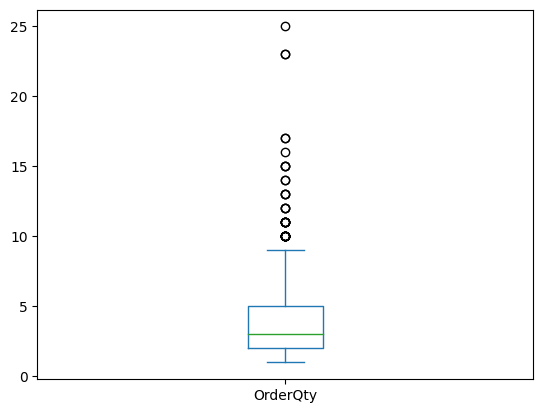

In [ ]:
# Box plot
ax = (df["OrderQty"]).plot.box()

The bottom of the box represents the 25% value, and the top represents the value at 75%. The middle line represents the median. The horizontal line at the top and bottom of the box are called whiskers. They typicall represent 1.5(IQR), where:
            IQR=Q3-Q1

Second, lets use the frequency table and histogram

In [ ]:
# Frequency table
binnedOrderQty = pd.cut(df["OrderQty"], 15)
binnedOrderQty.value_counts()

(0.976, 2.6]    231
(2.6, 4.2]      151
(5.8, 7.4]       54
(4.2, 5.8]       46
(7.4, 9.0]       24
(9.0, 10.6]      12
(10.6, 12.2]     10
(13.8, 15.4]      5
(12.2, 13.8]      3
(15.4, 17.0]      3
(21.8, 23.4]      2
(23.4, 25.0]      1
(17.0, 18.6]      0
(18.6, 20.2]      0
(20.2, 21.8]      0
Name: OrderQty, dtype: int64

Text(0.5, 0, 'Orders')

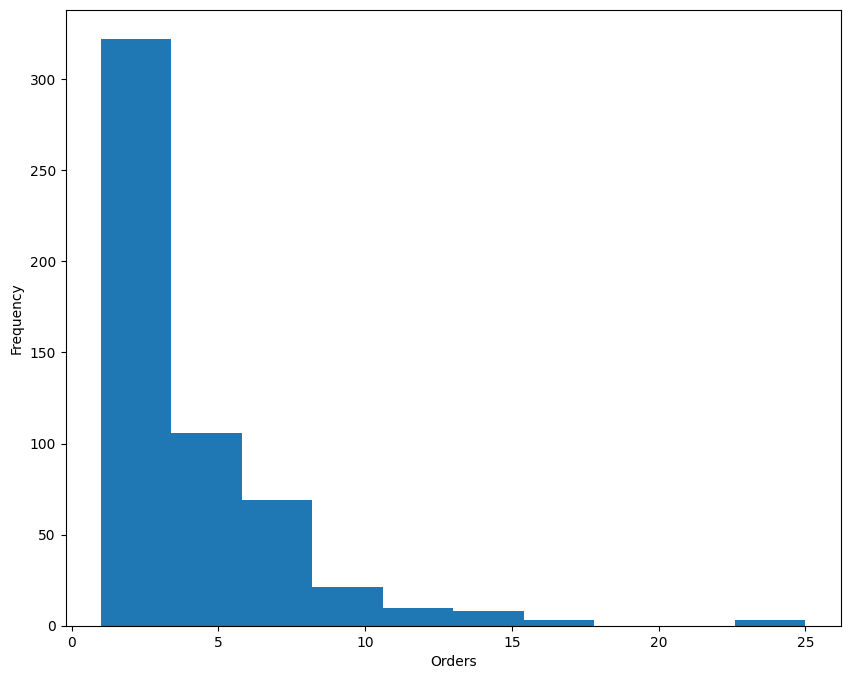

In [ ]:
# Histogram
ax = (df["OrderQty"]).plot.hist(figsize=(10,8))
ax.set_xlabel("Orders")

The histogram confirms our suspicion of the presence of outliers. The histogram/frequency plot groups the data into bins(intervals) in this case; we specify ten. We therefore take the (maximum value - minumum value)/10 to get the interval of each bin. The absence of values in the 8th and 9th bin and presence of values in the 10th one shows that there are extreme values that are affecting the mean, and standard deviation based on the mean.

Text(0.5, 0, 'Orders')

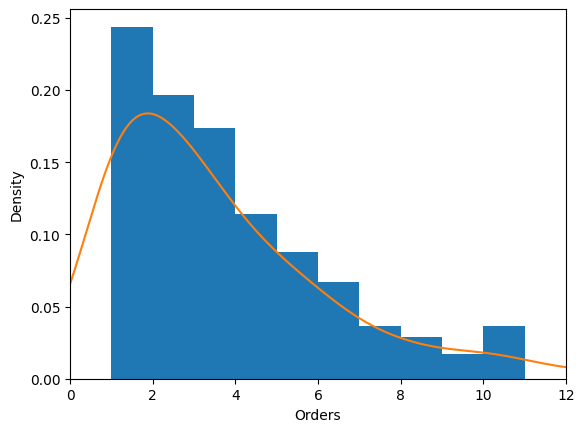

In [ ]:
# Density plot
ax = df["OrderQty"].plot.hist(density=True,xlim=[0,12], bins=range(1,12))
df["OrderQty"].plot.density(ax=ax)
ax.set_xlabel("Orders")

#Correlation

Lets explore the correlation between the variables

<Axes: >

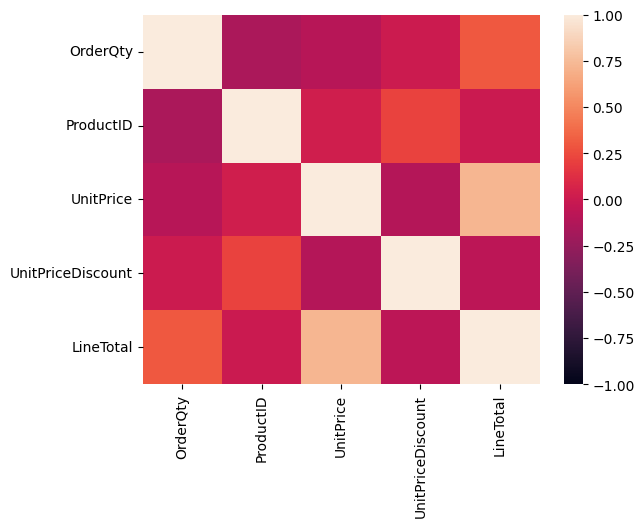

In [ ]:
#Heatmap
sns.heatmap(df[df.columns[1:]].corr(numeric_only=True), vmin=-1,vmax=1)

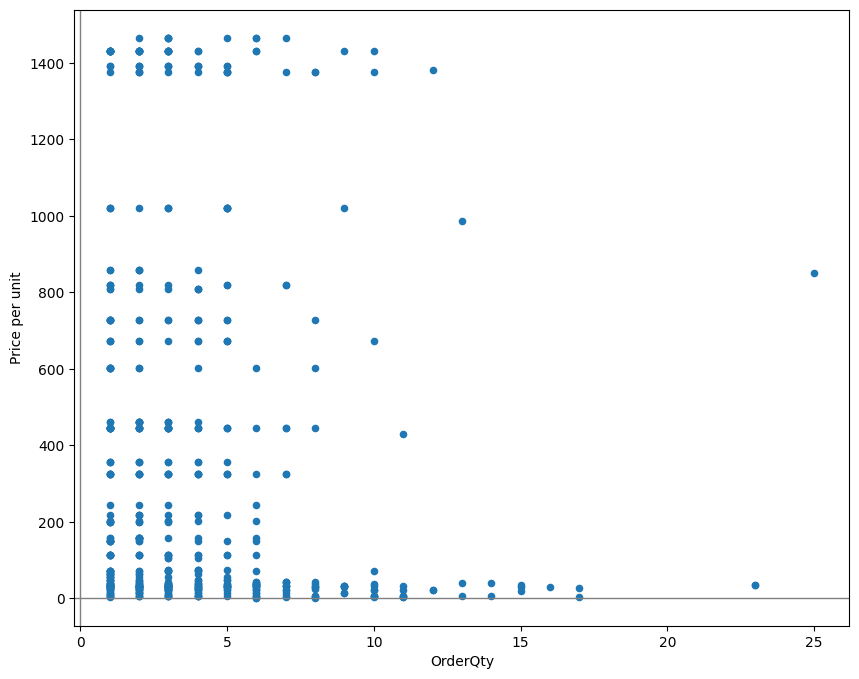

In [ ]:
#Scatter Plot
ax = df.plot.scatter(x='OrderQty', y= "UnitPrice", figsize=(10,8), xlabel="OrderQty",ylabel="Price per unit")
ax.axhline(0,color="grey",lw=1)
ax.axvline(0,color="grey",lw=1)

With more data, The scatterplot starts to become limiting as points start to overlap. Additionally, It doesnt really show the density/concentration of the points quite effectively. Lets try and show that using: Hexbin plots & Contour plots

<Axes: xlabel='OrderQty', ylabel='UnitPrice'>

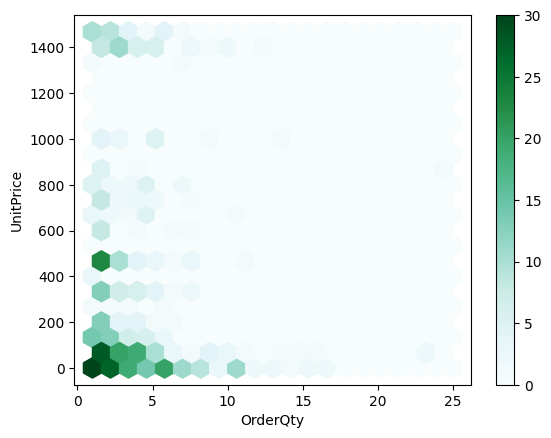

In [ ]:
#Hexbin
df.plot.hexbin(x='OrderQty', y='UnitPrice', gridsize=20)

As seen above, more datapoints are concentrated around a unit price range of 0-150 and an order quantity of 1-5. This means the most popular items ordered in the dataset cost less than 200 and customers typically order less than 5 items.
Howerver, there are a few high priced items ordered and indictated by the cluster around 1400.

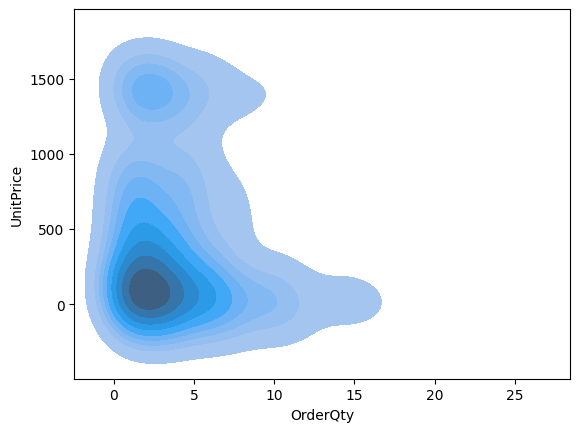

In [32]:
# Contour plot
ax=sns.kdeplot(df,x="OrderQty",y="UnitPrice",fill=True)

Now we can see the two distinct clusters

Let's visualize the orders by their product category

Text(0.5, 0, 'Product Category')

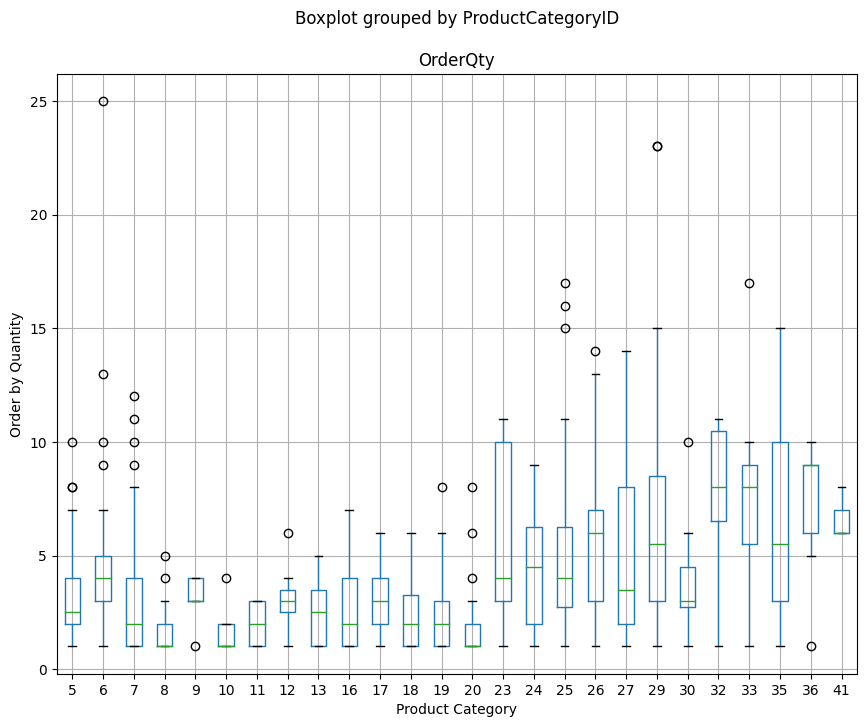

In [69]:
# Boxplot
ax=df.boxplot(by='ProductCategoryID',column="OrderQty",figsize=(10,8))
ax.set_ylabel("Order by Quantity")
ax.set_xlabel("Product Category")

We can now visualize the distribution of the orders by their product category. Using a boxplot for this also shows the outliers by their product category. tHe only setback is the we cannot see the density of the purchases in the boxplot. The density in this case might answer which product category has the highest concentration of orders. To show this, let us use the violin plot.

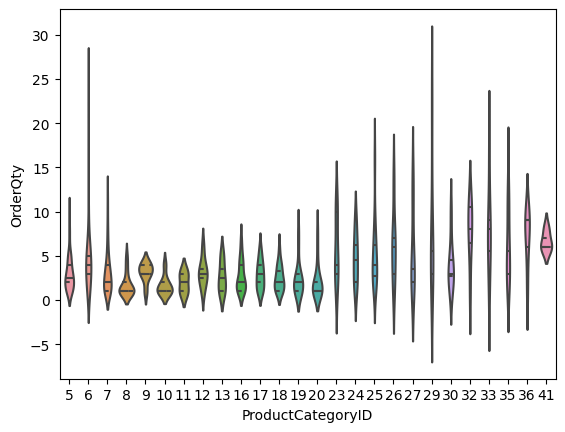

In [76]:
# Violin plot
ax= sns.violinplot(df,x="ProductCategoryID",y="OrderQty",inner="quartile")

Seem like lower product categories have a higher order density(Number of orders) than the higher categories. (Granted that categories are norminal so by higher, I do not mean ranking)